## Step 2 Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environments.BiddingEnvironment import *
from learners.GTS_Learner import *
from learners.GPTS_Learner import *
from data_generators.basic_generator import *

In [2]:
data_gen = BasicDataGenerator('src/basic002.json')

prices = data_gen.get_prices()
bids = data_gen.get_bids()
json_src = 'src/basic002.json'

aggr_cpc = data_gen.get_costs_per_click(mode='aggregate')
aggr_d_clicks = data_gen.get_daily_clicks(mode='aggregate')
aggr_conv_rates = data_gen.get_conversion_rates(mode='aggregate')
aggr_purch = data_gen.get_future_purchases(mode='aggregate')

In [3]:
n_arms = len(bids)

min_bid = min(bids)
max_bid = max(bids)

b = np.linspace(0.0, 1.0, n_arms) #for testinf use linspace for bids
sigma = 10

In [4]:
#P
print(f'prices = {prices}')
print(f'bids = {bids}')
#print(f'{aggr_cpc=}')
#print(f'{aggr_d_clicks=}')
#print(f'{aggr_conv_rates=}')
#print(f'{aggr_purch=}')

prices = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
bids = [0.03, 0.04, 0.07, 0.1, 0.2, 0.5, 0.75, 1.0, 1.5, 2.0]


In [13]:
T = 100
n_experiments = 5

gts_rewards_per_experiment = []
gpts_rewards_per_experiment = []

In [14]:
for e in range(0, n_experiments):
    env = BiddingEnvironment(bids = b, sigma = sigma, src = json_src, mode = 'aggregate')
    gts_learner = GTS_Learner(n_arms = n_arms)
    gpts_learner = GPTS_Learner(n_arms = n_arms, arms = bids)
    for t in range(0, T):
        #pulled_arm = gts_learner.pull_arm()
        #reward = env.round(pulled_arm)
        #gts_learner.update(pulled_arm, reward)
        
        pulled_arm = gpts_learner.pull_arm()
        reward = env.round(pulled_arm)
        if(e == 0):
            print('reward = ' + f'{reward}')
            
        gpts_learner.update(pulled_arm, reward)
        
    gts_rewards_per_experiment.append(gts_learner.collected_rewards)
    gpts_rewards_per_experiment.append(gpts_learner.collected_rewards)

Environment created with fixed price: 15
reward = 6469.88822143501
reward = 3867.809153969089
reward = 5522.819256890106
reward = 6091.733385697056
reward = 6089.476521124443
reward = 5308.858920589916
reward = 6705.089754959647
reward = 6226.729124792634
reward = 6245.46527630121
reward = 5759.777441045544
reward = 6570.329034156256
reward = 5507.031661732488
reward = 5389.329420868231
reward = 5786.520005505173
reward = 5545.967159715064
reward = 4293.582316072201
reward = 5572.662444160191
reward = 4727.009344632092
reward = 7036.152066361982
reward = 5526.859739243128
reward = 5119.642284753346
reward = 6216.867263186296
reward = 5663.144186235828
reward = 5966.001724719352
reward = 5454.360797343447
reward = 5582.2410010923995
reward = 6251.621206504078
reward = 5472.120365891071
reward = 5588.764774389469
reward = 2181.080525775893
reward = 5696.986938389328
reward = 5198.794993902985
reward = 5572.6469299891
reward = 5952.525392979675
reward = 5610.338936859204
reward = 5904.918

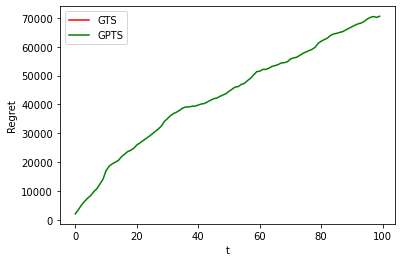

In [15]:
#opt = np.max(env.means)
opt = env.get_opt()

plt.figure(0)
plt.ylabel("Regret")
plt.xlabel("t")
plt.plot(np.cumsum(np.mean(opt - gts_rewards_per_experiment, axis=0)), 'r')
plt.plot(np.cumsum(np.mean(opt - gpts_rewards_per_experiment, axis=0)), 'g')
plt.legend(['GTS', 'GPTS'])
plt.show()